In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('wine_data.csv',header=None, usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']



In [11]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

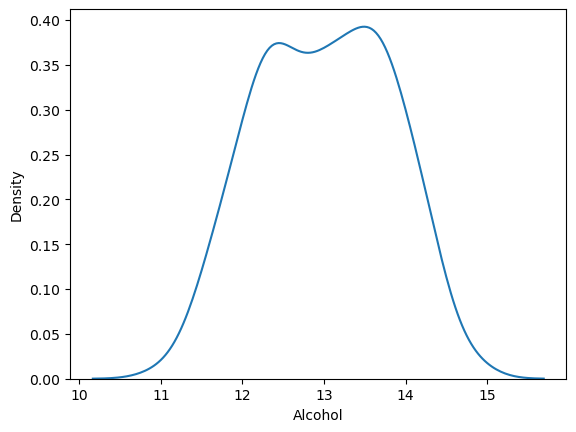

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

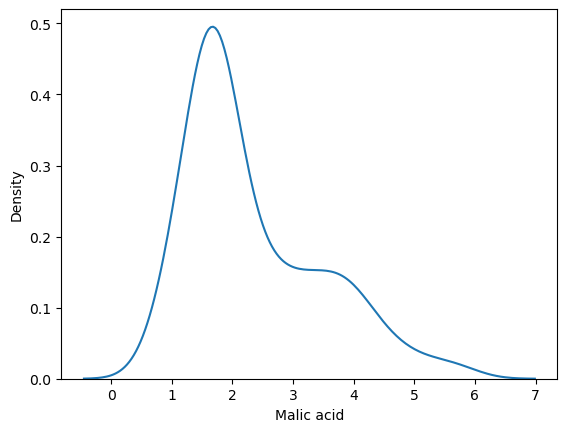

In [5]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

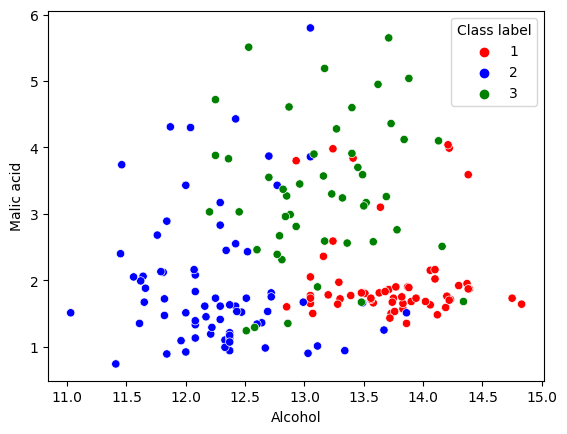

In [17]:
color_dict={1:'red',3:'green',2:'blue'}


#sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

# Pass the DataFrame to the scatterplot function
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label', palette=color_dict)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df.drop('Class label',axis =1),
                                               df['Class label'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled =scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)


In [22]:
x_train_scaled =pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled =pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [23]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [25]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


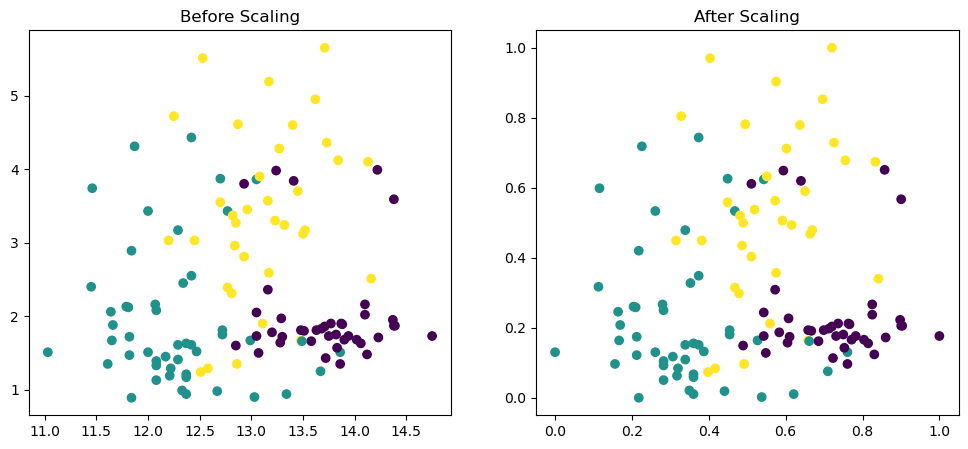

In [29]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

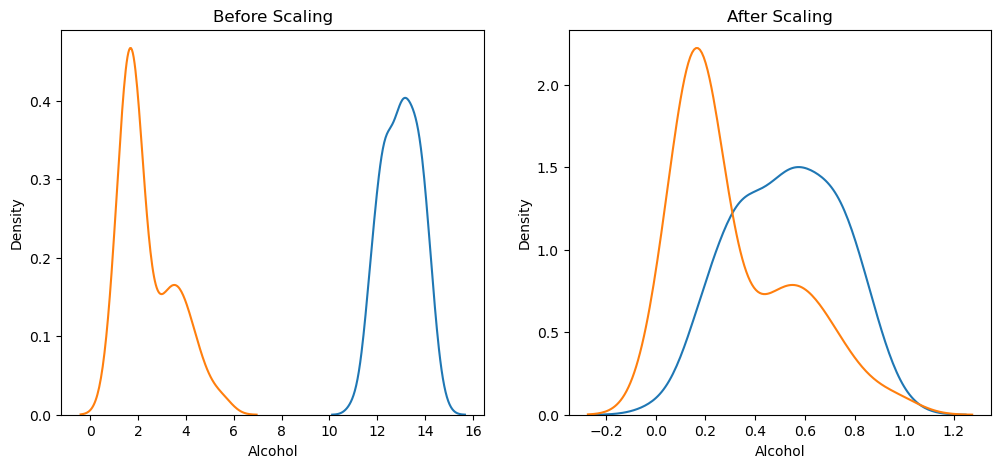

In [36]:
fig ,(ax1, ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train ['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)
#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled ['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()

<Axes: xlabel='Alcohol', ylabel='Density'>

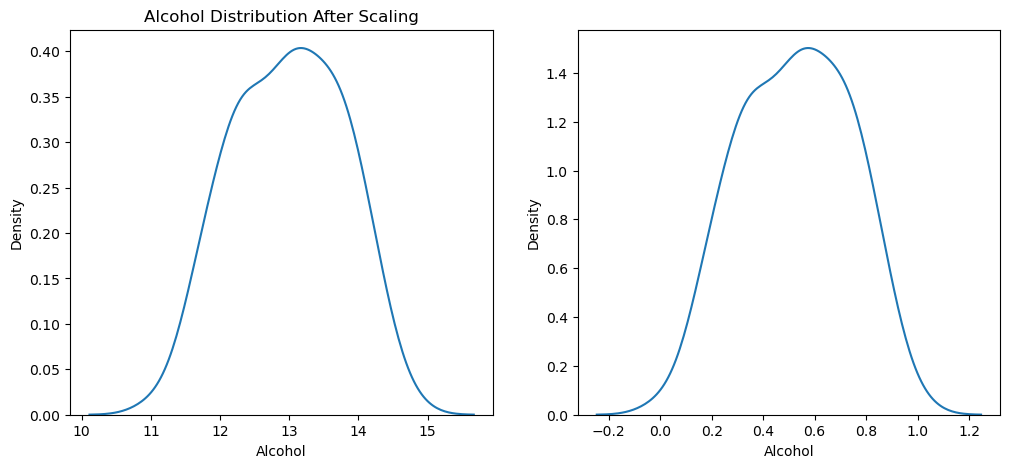

In [37]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
#after scaling
ax1.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)


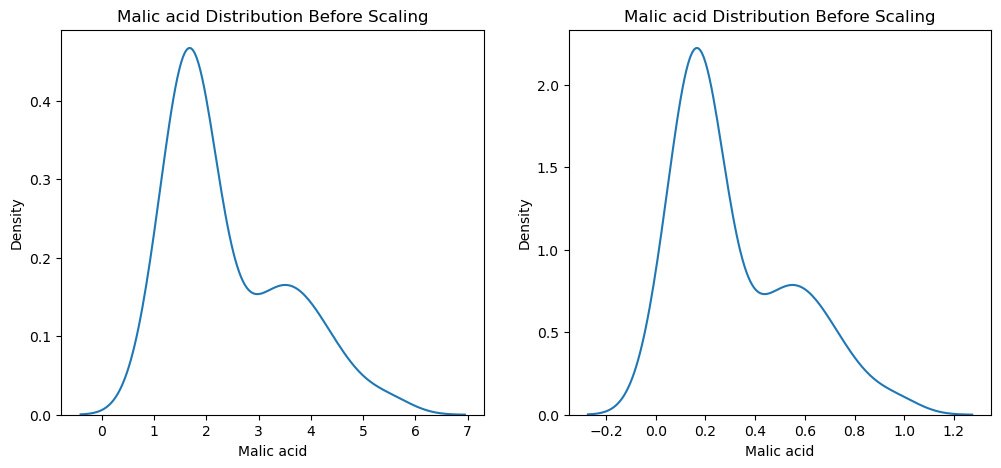

In [40]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'],ax=ax1)
#after scaling
ax2.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()